# Step 3: Model Evaluation

In [ ]:
# import libraries
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
# Specify output & input dir
input_dir=''
null='230301_elasticnet_partialcorr_all_pearson_NULL.csv'
model='230301_elasticnet_partialcorr_all_pearson.csv'

In [5]:
# load prediction accuracy data 
model_r = pd.read_csv(os.path.join(input_dir,model), header=None).values
null_r = pd.read_csv(os.path.join(input_dir,null), header=None).values

perm, n_targets = model_r.shape

In [10]:
# Evaluates whether each model is better than the null
def get_null_p(x,null): # One-sided paired test
    diff = x - null
    pval = (np.sum(diff<=0)+1) / (len(diff)+1)
    return pval

# Two sided paired test
def get_exact_p(x,y):
    diff = x - y
    xbigger = (np.sum(diff>=0)+1) / (len(diff)+1)
    xsmaller = (np.sum(diff<=0)+1) / (len(diff)+1)
    pval = 2*min(xbigger,xsmaller)    
    return pval

In [9]:
# Evaluate per target
one_sided = np.full(n_targets, np.nan)
two_sided = np.full(n_targets, np.nan)

for t in range(n_targets):
    one_sided[t] = get_null_p(model_r[:, t], null_r[:, t])
    two_sided[t] = get_exact_p(model_r[:, t], null_r[:, t])

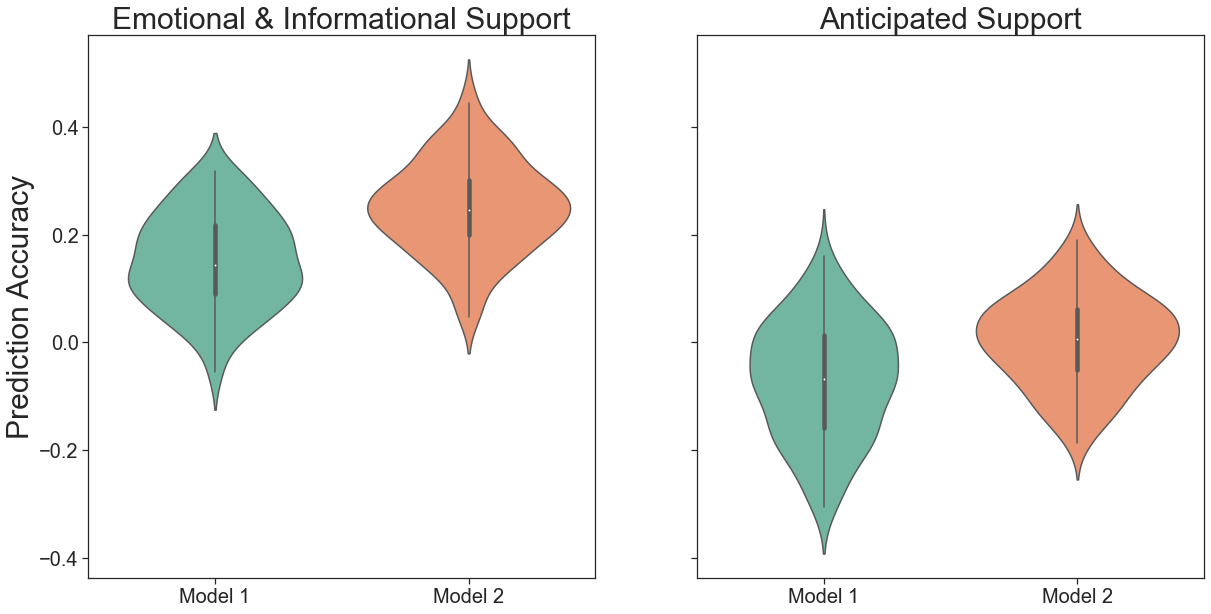

In [408]:
# Plot violin plots for all of the models
fig, axes = plt.subplots(1, n_targets, figsize=(20, 10), sharey=True, sharex=True)
sns.set(style="ticks")

for i in range(n_targets):
    data = pd.DataFrame({
        "Model": model_r[:, i],
        "Null":  null_r[:, i]
    })
    sns.violinplot(ax=axes[i], data=data, palette="Set2")
    axes[i].set_title(y_metric_names[i], fontsize=30)
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=20)

axes[0].set_ylabel("Prediction Accuracy", fontsize=30)
plt.tight_layout()
# fig.savefig(os.path.join(output_dir,"ViolinPlot_Model_vs_Null.svg"))
plt.show()

In [ ]:
# Plot violin plots for all of the models + p-values
fig, axes = plt.subplots(1, n_targets, figsize=(20, 10), sharey=True, sharex=True)
sns.set(style="ticks")

for i in range(n_targets):
    data = pd.DataFrame({
        "Model": model_r[:, i],
        "Null":  null_r[:, i]
    })
    sns.violinplot(ax=axes[i], data=data, palette="Set2")
    axes[i].set_title(y_metric_names[i], fontsize=30)
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=20)
    # p-values (one-sided better-than-null, and two-sided)
    axes[i].text(0.5, 0.95,
                 f"p(one-sided) = {one_sided[i]:.3g}\n"
                 f"p(two-sided) = {two_sided[i]:.3g}",
                 transform=axes[i].transAxes, ha='center', va='top', fontsize=14)

axes[0].set_ylabel("Prediction Accuracy", fontsize=30)
plt.tight_layout()
# fig.savefig(os.path.join(output_dir, "ViolinPlot_Model_vs_Null.svg"))
plt.show()